# Mode movie

- with this notebook we demonstrate how to visualize and animate the modes for a given wave vector
- as an example a permallow film of 50 nm in thickness is taken
- the dispersion is computed for the Damon-Eshbach geometry, wave vector perpendicular to the ground magnetic state stabilized by an external static magnetic field of 20 mT

In [1]:
import tetrax as tx
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

Let's create a permalloy thick film of 50 nm, compute the dispersion and show the modes at k=0 (or any k) as a movie.

In [2]:
sample = tx.create_sample(name="Monolayer_mode_movie",geometry="layer")
mesh = tx.geometries.monolayer_line_trace(50,lc=2)
sample.set_geom(mesh)

Setting geometry and calculating discretized differential operators on mesh.
Done.


Creating the experimental setup, applying a static external field of 20 mT.

In [3]:
exp = tx.create_experimental_setup(sample)
sample.mag = [1,0,0]
exp.Bext = [20e-3,0,0]
dispersion = exp.eigenmodes(kmin=0,kmax=40e6,num_modes=5,num_cpus=-1,save_modes=True)

100%|██████████| 81/81 [00:09<00:00,  8.18it/s]


Plotting the dispersion

<IPython.core.display.Javascript object>


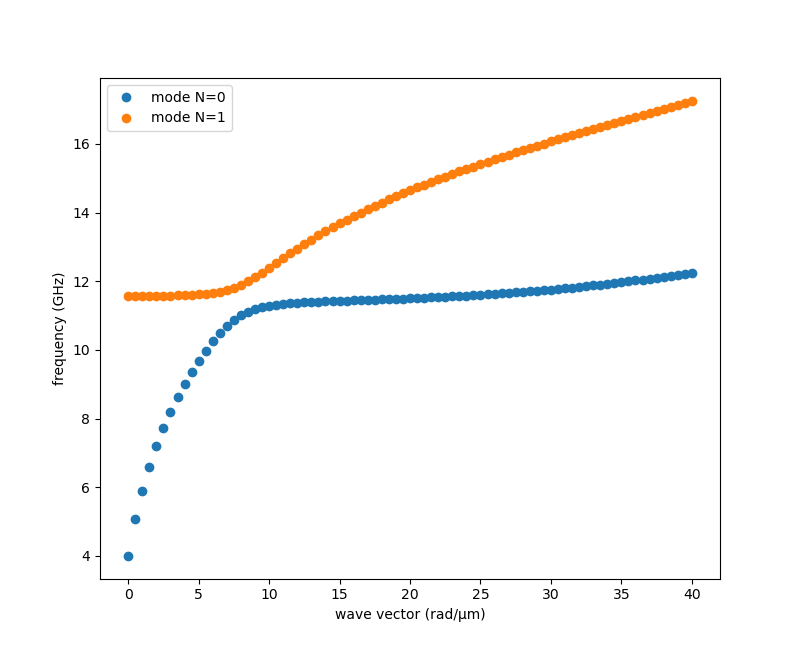

In [4]:
k_ = dispersion["k (rad/m)"]
plt.rcParams["figure.figsize"] = (8,6.5)
plt.figure()
for i in range(2):
    plt.plot(k_*1e-6,dispersion[f"f{i} (GHz)"],ls="",marker="o", label=f"mode N={i}")

plt.xlabel('wave vector (rad/µm)')
plt.ylabel("frequency (GHz)")

plt.legend()
plt.show()

## Show mode movies

- any experiment created by the experimental setup has the show_mode() method, that will visualize the mode colored by the dynamical component, if requested also in an animated form
- the options are:
    - wave vector, k=..., should be supplied in [rad/µm]
    - mode number, N=...
    - scaling the magnetization, scale=...,
    - on the equilibrium or without, on_equilibrium=True or False
    - animated = True or False
    - the requested periods, periods=...
    - frames_per_period=...
    - frames per seconds, fps=... 
    - scaling the dynamical components, scale_mode=...

- Here is an example for a Daemon-Eshbach surface mode, namely the mode with N=1 for k=10 (rad/µm), choosing 10 periods, 30 frames per seconds, etc...
    
- The mode movie will show that the N=1 mode is localized mostly to one of the surfaces

In [5]:
exp.show_mode(k=10,N=1,periods=10,animated=True,scale=10,fps=30,scale_mode=2)

Output()

![mode movie image](modemovie.gif)